In [1]:
#import libraries
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import cv2
import matplotlib.pyplot as plt

# Read DICOM file

In [2]:
def read_xray(path, voi_lut=True, fix_monochrome=True, apply_clahe=True, clipLimit=2.0, tileGridSize=(8, 8)):
    dicom = pydicom.read_file(path)

    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array

    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data

    data = data - np.min(data)
    data = data / np.max(data)
    #     data = data.astype(np.float32)
    #     data = (data * 255.0).astype(np.float32) # no need for this I think

    if apply_clahe:
        data = apply_clahe_to_image(data, clipLimit=clipLimit, tileGridSize=tileGridSize)

    return data



In [3]:

def apply_clahe_to_image(image, clipLimit=2.0, tileGridSize=(8, 8)):
    # Convert image to uint16
    image = (image * 65535).astype(np.uint16)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)

    # Apply CLAHE
    clahe_image = clahe.apply(image)

    # Convert image back to float32 in range [0, 1]
    clahe_image = clahe_image.astype(np.float32) / 65535.0

    return clahe_image


In [4]:

def plot_images(images, titles, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(9, 9))
    for i, (image, title) in enumerate(zip(images, titles)):
        ax = axes[i // cols, i % cols]
        ax.imshow(image, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()


In [5]:
# spine 
# path = '../data/raw/00087195a35bb9948323aa89ccb2a860.dicom' 
# chest 
path = '../data/raw/0007d316f756b3fa0baea2ff514ce945.dicom'

- test with different clipLimits and tileGridSizes

In [6]:


# clipLimits = [2.0, 0.3]
# tileGridSizes = [(6, 6), (8, 8)]
# images = []
# titles = []
# 
# # for clipLimit in clipLimits:
# #     for tileSize in tileGridSizes:
# #         images.append(read_xray(path, clipLimit=clipLimit, tileGridSize=tileSize))
# #         titles.append(f"clipLimit={clipLimit}, tileGridSize={tileSize}")
# # 
# # titles = [f"CL={clipLimit}, GS={tileSize}" for clipLimit in clipLimits for tileSize in tileGridSizes]
# # 
# # plot_images(images, titles, len(clipLimits), len(tileGridSizes))
# 
# for clipLimit in clipLimits:
#     for tileSize in tileGridSizes:
#         image_data = read_xray(path, clipLimit=clipLimit, tileGridSize=tileSize)
#         title = f"clipLimit={clipLimit}, tileGridSize={tileSize}"
#         plt.figure(figsize=(8, 8))
#         plt.imshow(image_data, cmap='gray')
#         plt.title(title)
#         plt.axis('off')
#         plt.show()
#         
        




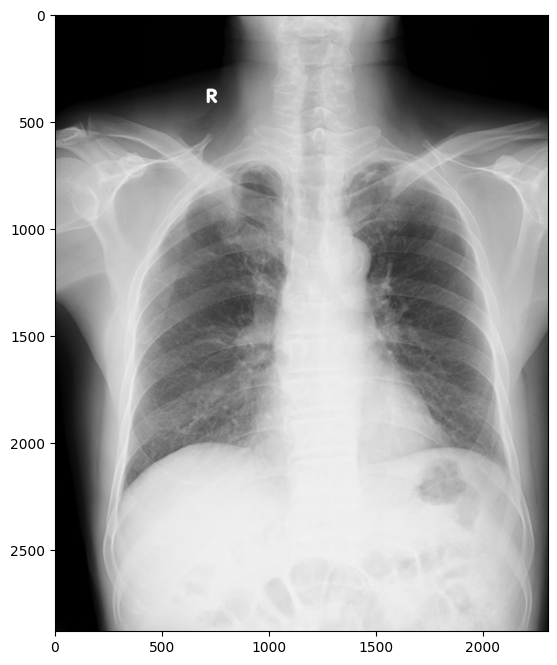

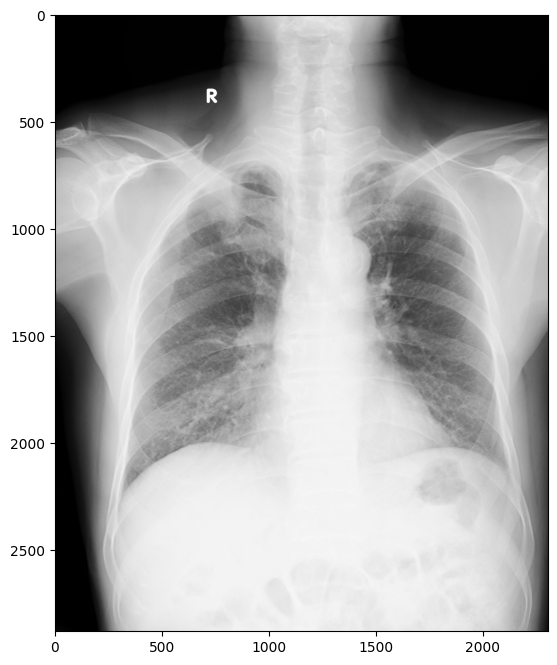

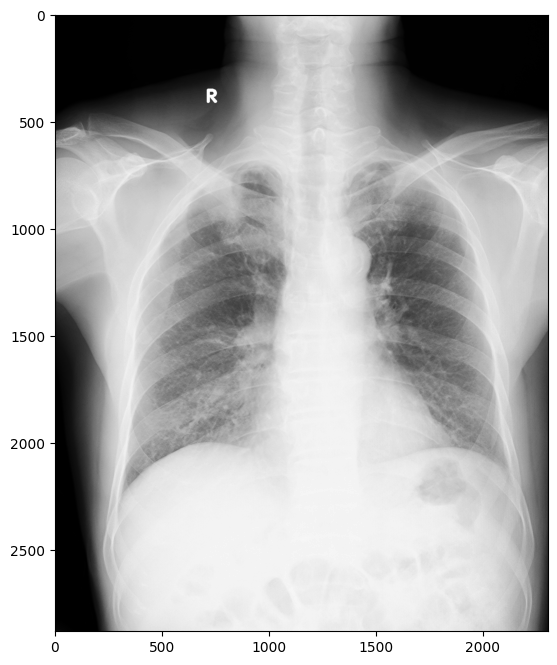

In [7]:

img = read_xray(path, voi_lut=False , apply_clahe=False,fix_monochrome=True)
plt.figure(figsize = (8,8))
# plt.imshow(img, cmap='bone')
plt.imshow(img, cmap='gray')

# img = read_xray(path, voi_lut=True, apply_clahe=False)
# plt.figure(figsize=(8, 8))
# # plt.imshow(img, cmap='bone')
# plt.imshow(img, cmap='gray')

img = read_xray(path, voi_lut=False , apply_clahe=True)
plt.figure(figsize=(8, 8))
# plt.imshow(img, cmap='bone')
plt.imshow(img, cmap='gray')

img = read_xray(path, voi_lut=True , apply_clahe=True)
plt.figure(figsize = (8,8))
# plt.imshow(img, cmap='bone')
plt.imshow(img, cmap='gray')